# imports

In [2]:
from rdkit import Chem
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw, rdDepictor
from PIL import Image
import io

In [3]:
df = pd.read_csv("ligand_scaffold_data.csv")

In [4]:
ss = df.groupby("scaffold_orig_id").head(1)

In [5]:
len(ss)

137

In [6]:
top20 = ss.sort_values("scaffold_count", ascending=False).head(20)

In [7]:
top20.sort_values("scaffold_orig_id", inplace=True)

In [8]:
scaffold_list = [(f"Scaffold {scaffold_id}", Chem.MolFromSmiles(smiles)) for scaffold_id, smiles in 
                 zip(top20["scaffold_orig_id"], top20["scaffold_smarts"])]

In [9]:
scaffold_list

[('Scaffold 1', <rdkit.Chem.rdchem.Mol at 0x15d7630d0>),
 ('Scaffold 2', <rdkit.Chem.rdchem.Mol at 0x15d762d50>),
 ('Scaffold 3', <rdkit.Chem.rdchem.Mol at 0x15d763140>),
 ('Scaffold 4', <rdkit.Chem.rdchem.Mol at 0x15d7631b0>),
 ('Scaffold 5', <rdkit.Chem.rdchem.Mol at 0x15d763220>),
 ('Scaffold 6', <rdkit.Chem.rdchem.Mol at 0x15d763290>),
 ('Scaffold 8', <rdkit.Chem.rdchem.Mol at 0x15d763300>),
 ('Scaffold 10', <rdkit.Chem.rdchem.Mol at 0x15d763370>),
 ('Scaffold 11', <rdkit.Chem.rdchem.Mol at 0x15d7633e0>),
 ('Scaffold 12', <rdkit.Chem.rdchem.Mol at 0x15d763450>),
 ('Scaffold 14', <rdkit.Chem.rdchem.Mol at 0x15d7634c0>),
 ('Scaffold 17', <rdkit.Chem.rdchem.Mol at 0x15d763530>),
 ('Scaffold 18', <rdkit.Chem.rdchem.Mol at 0x15d7635a0>),
 ('Scaffold 19', <rdkit.Chem.rdchem.Mol at 0x15d763610>),
 ('Scaffold 20', <rdkit.Chem.rdchem.Mol at 0x15d763680>),
 ('Scaffold 22', <rdkit.Chem.rdchem.Mol at 0x15d7636f0>),
 ('Scaffold 23', <rdkit.Chem.rdchem.Mol at 0x15d763760>),
 ('Scaffold 24', <rdk

In [10]:
from rdkit import Chem
from rdkit.Chem import Draw, rdDepictor
from PIL import Image
import io
# import cairosvg  # For SVG → PNG/PDF conversion

def draw_scaffolds(
    scaffold_list: list[(str, Chem.Mol)],
    first_n=-1,
    mols_per_row=-1,
    use_svg=False,
    save_pdf=False,
    out_file=None
):
    scaffold_rdmols = [Chem.RemoveHs(mol[1]) for mol in scaffold_list]

    # Set Draw Options
    dopts = Draw.rdMolDraw2D.MolDrawOptions()
    dopts.setHighlightColour((68 / 256, 178 / 256, 212 / 256))
    dopts.highlightBondWidthMultiplier = 16

    # Compute 2D coords
    for mol in scaffold_rdmols[:first_n]:
        rdDepictor.Compute2DCoords(mol)
        rdDepictor.StraightenDepiction(mol)

    # Create grid image
    img = Draw.MolsToGridImage(
        scaffold_rdmols[:first_n],
        molsPerRow=mols_per_row,
        subImgSize=(200, 200),
        useSVG=use_svg,
        legends=[mol[0] for mol in scaffold_list[:first_n]],
        drawOptions=dopts,
    )

    # Save to PDF if requested
    if save_pdf and out_file:
        if use_svg:
            # img is a string of SVG
            # png_bytes = cairosvg.svg2png(bytestring=img.encode("utf-8"))
            # pil_img = Image.open(io.BytesIO(png_bytes))
            raise NotImplementedError("SVG to PDF conversion not implemented in this example.")
        else:
            # img is an IPython Image object → get PNG bytes
            pil_img = Image.open(io.BytesIO(img.data))

        pil_img.save(out_file, "PDF")

    return img


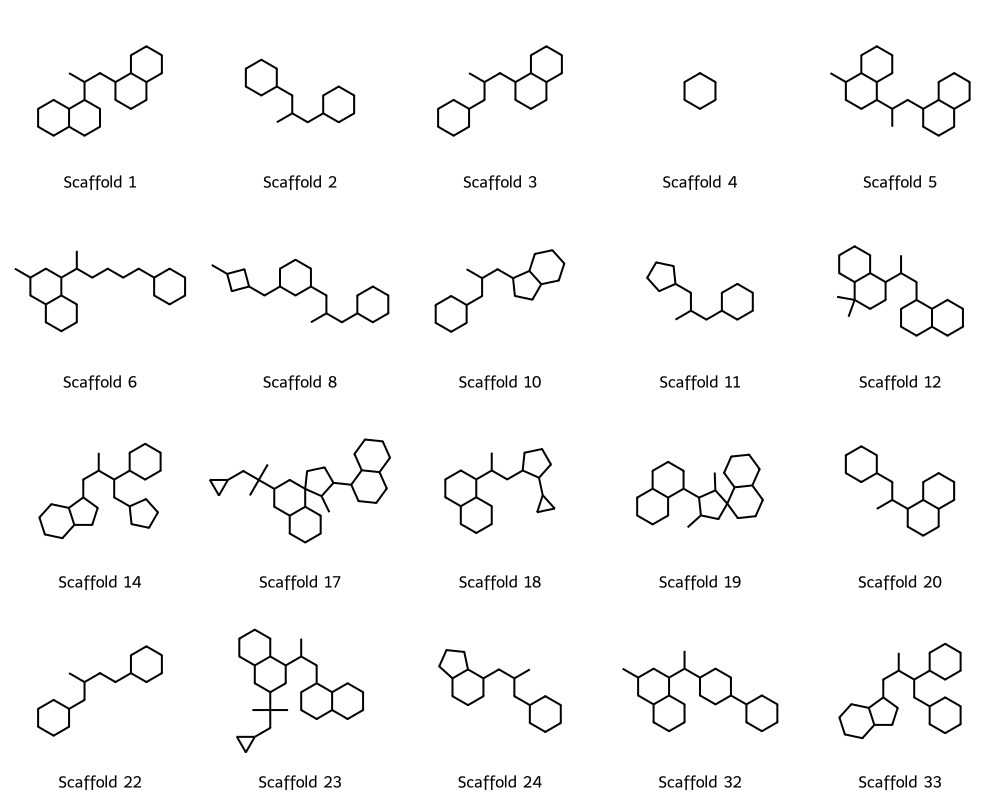

In [11]:
draw_scaffolds(
    scaffold_list,
    first_n=20,
    mols_per_row=5,
    use_svg=False,  # PNG route is simpler for PDF
    save_pdf=True,
    out_file="top20_scaffolds.pdf"
)


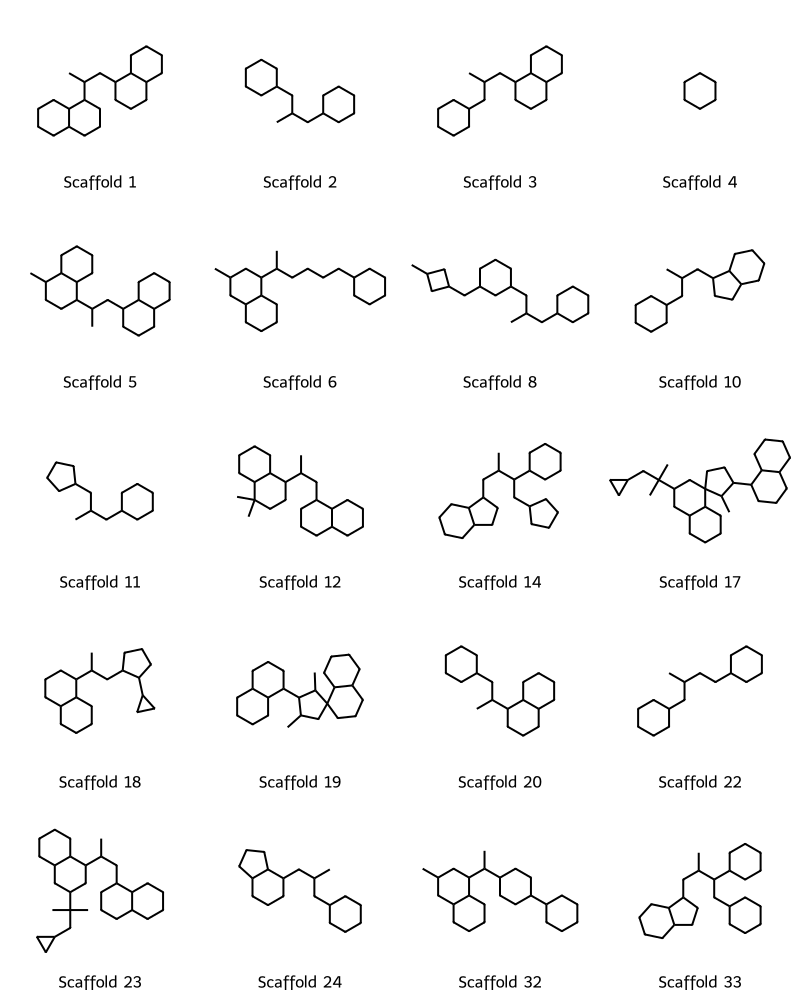

In [12]:
draw_scaffolds(
    scaffold_list,
    first_n=20,
    mols_per_row=4,
    use_svg=False,  # PNG route is simpler for PDF
    save_pdf=True,
    out_file="top20_scaffolds_5x4.pdf"
)

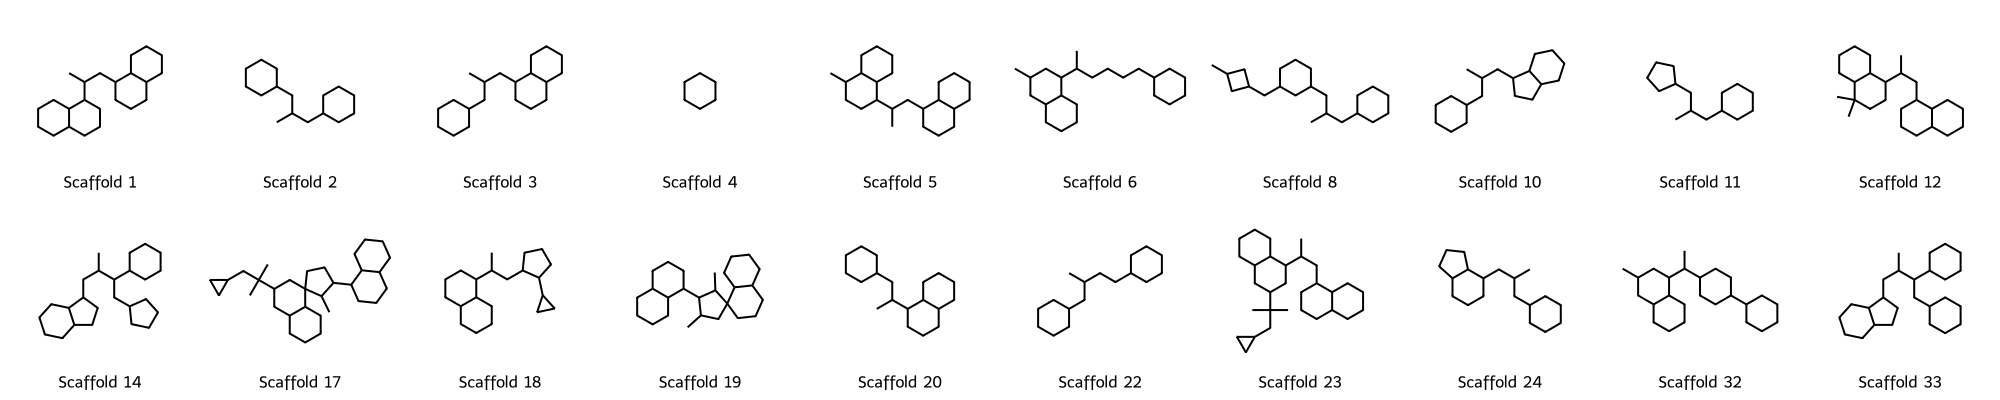

In [13]:
draw_scaffolds(
    scaffold_list,
    first_n=20,
    mols_per_row=10,
    use_svg=False,  # PNG route is simpler for PDF
    save_pdf=True,
    out_file="top20_scaffolds_2x10.pdf"
)

# Make a figure with an example of each scaffold

In [14]:
df

,index,compound_name,scaffold_orig_id,compound_date,scaffold_smarts,smiles,scaffold_count,scaffold_first_date,scaffold_smarts_from_scaff_data
0,0,MAT-POS-c9973a83-1,2,2020-08-04 15:19:35,CC(CC1CCCCC1)CC1CCCCC1,CNC(=O)C[N@H+]1Cc2ccc(cc2[C@]3(C1)CCN(C3=O)c4c...,58,2020-02-27 01:46:57,CC(CC1CCCCC1)CC1CCCCC1
1,1,JAN-GHE-83b26c96-15,2,2020-07-10 04:24:26,CC(CC1CCCCC1)CC1CCCCC1,CNC(=O)C[N@H+]1Cc2ccc(cc2[C@]3(C1)CCN(C3=O)c4c...,58,2020-02-27 01:46:57,CC(CC1CCCCC1)CC1CCCCC1
2,2,JAG-UCB-a3ef7265-3,134,2020-06-11 16:59:39,CC(CC1CCCCC1)C1CCC2CCCCC21,CNC(=O)C[N@H+]1Cc2ccc(cc2[C@]3(C1)CCN(C3=O)c4c...,1,2020-06-11 16:59:39,CC(CC1CCCCC1)C1CCC2CCCCC21
3,3,AAR-POS-d2a4d1df-6,52,2020-02-26 13:14:49,CC(CCC1CCCCC1)C1CCCCC1,CNC(=O)C[N@H+]1Cc2ccc(cc2[C@]3(C1)CCN(C3=O)c4c...,2,2020-02-26 13:14:49,CC(CCC1CCCCC1)C1CCCCC1
4,4,AAR-POS-d2a4d1df-10,65,2020-02-27 08:42:31,CC(CCCC1CCCCC1)C1CCCCC1,CNC(=O)C[N@H+]1Cc2ccc(cc2[C@]3(C1)CCN(C3=O)c4c...,1,2020-02-27 08:42:31,CC(CCCC1CCCCC1)C1CCCCC1
...,...,...,...,...,...,...,...,...,...
398,398,EDJ-MED-976a33d5-1,146,2022-01-19 19:27:19,CC1C(C2CC2)CC2(CCC(C3CCCC4CCCCC43)C2C)C2CCCCC12,CNC(=O)C[N@H+]1Cc2ccc(cc2[C@]3(C1)CCN(C3=O)c4c...,1,2022-01-19 19:27:19,CC1C(C2CC2)CC2(CCC(C3CCCC4CCCCC43)C2C)C2CCCCC12
399,399,ALP-POS-ecbed2ba-12,111,2022-01-19 19:55:19,CC(CCC1CC1)CC1CC2CCCCC2C2(CCC(C3CCCC4CCCCC43)C...,CNC(=O)C[N@H+]1Cc2ccc(cc2[C@]3(C1)CCN(C3=O)c4c...,1,2022-01-19 19:55:19,CC(CCC1CC1)CC1CC2CCCCC2C2(CCC(C3CCCC4CCCCC43)C...
400,400,MAT-POS-50a80394-1,17,2022-02-05 04:11:10,CC1C(C2CCCC3CCCCC32)CCC12CC(C(C)(C)CC1CC1)CC1C...,CNC(=O)C[N@H+]1Cc2ccc(cc2[C@]3(C1)CCN(C3=O)c4c...,4,2021-10-07 20:44:02,CC1C(C2CCCC3CCCCC32)CCC12CC(C(C)(C)CC1CC1)CC1C...
401,401,ALP-POS-133e7cd9-2,110,2022-02-05 05:01:48,CC1C(C2CCCC3CCCCC32)CCCC12CC(C(C)(C)CC1CC1)CC1...,CNC(=O)C[N@H+]1Cc2ccc(cc2[C@]3(C1)CCN(C3=O)c4c...,1,2022-02-05 05:01:48,CC1C(C2CCCC3CCCCC32)CCCC12CC(C(C)(C)CC1CC1)CC1...
